 # Importing all the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

#Loading the Data

In [3]:
data = pd.read_csv("creditcard.csv")

#Understanding the Data

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Describing the Data

In [5]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

#Imbalance in the data

In [6]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#Print the amount details for Fraudulent Transaction

In [7]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

#Plotting the Correlation Matrix

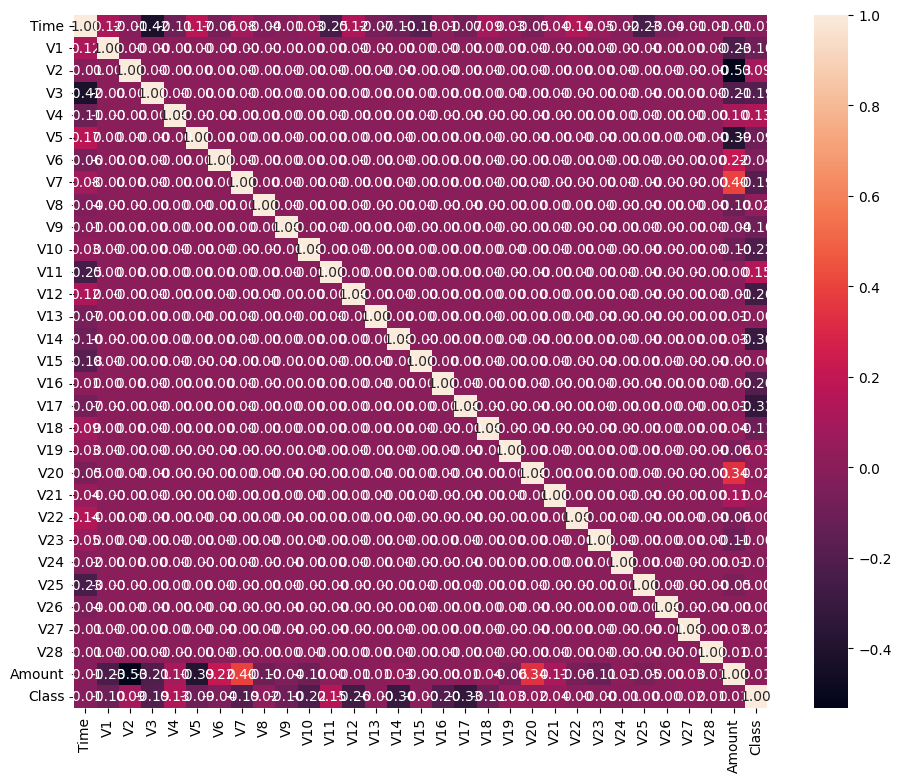

In [8]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True, annot=True, fmt = '.2f')
plt.show()

#Separating the X and the Y values

#Training and Testing Data Bifurcation

In [29]:
mean = data['Amount'].mean()
std = data['Amount'].std()
data1 = data[(data['Amount'] >= 0) & (data['Amount'] <= 2200)]
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


2125.87

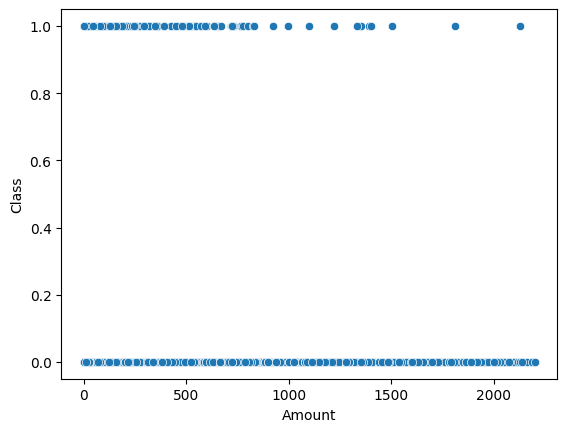

In [30]:
sns.scatterplot(data=data1,x='Amount',y='Class')
data.loc[data['Class'] == 1, 'Amount'].max()

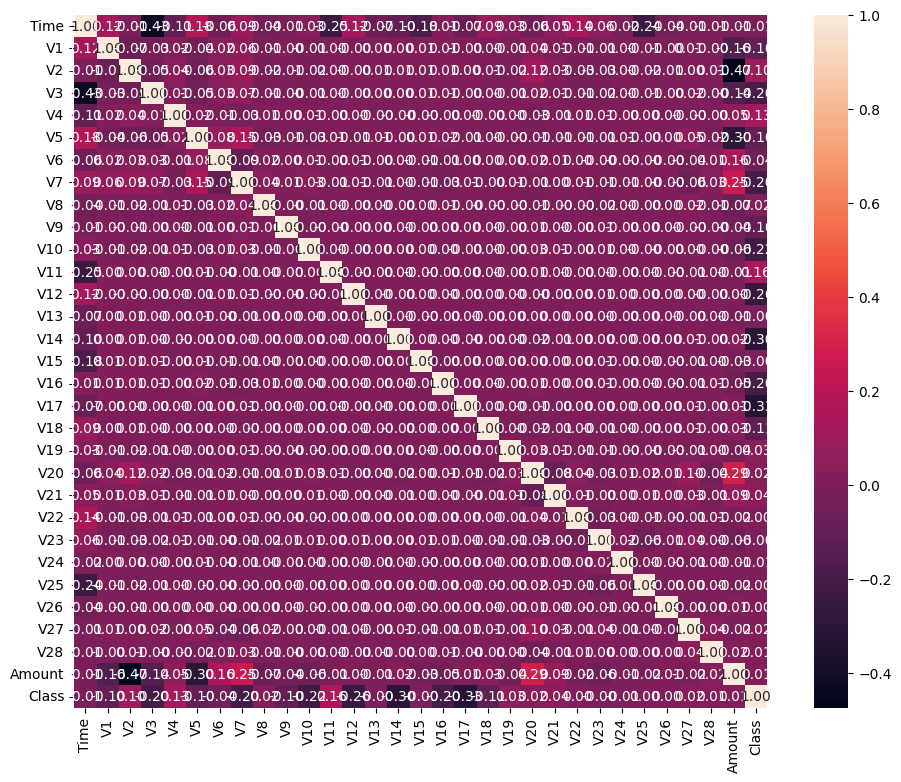

In [41]:
corrmat = data1.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, square = True, annot=True, fmt = '.2f')
plt.show()

In [33]:
# dividing the X and the Y from the dataset
X = data1.drop(['Class'], axis = 1)
Y = data1["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284239, 30)
(284239,)


In [34]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


The model used is Random Forest classifier
The accuracy is 0.999560230790881
The precision is 0.9534883720930233
The recall is 0.7961165048543689
The F1-Score is 0.8677248677248677
The Matthews correlation coefficient is0.8710488552551049


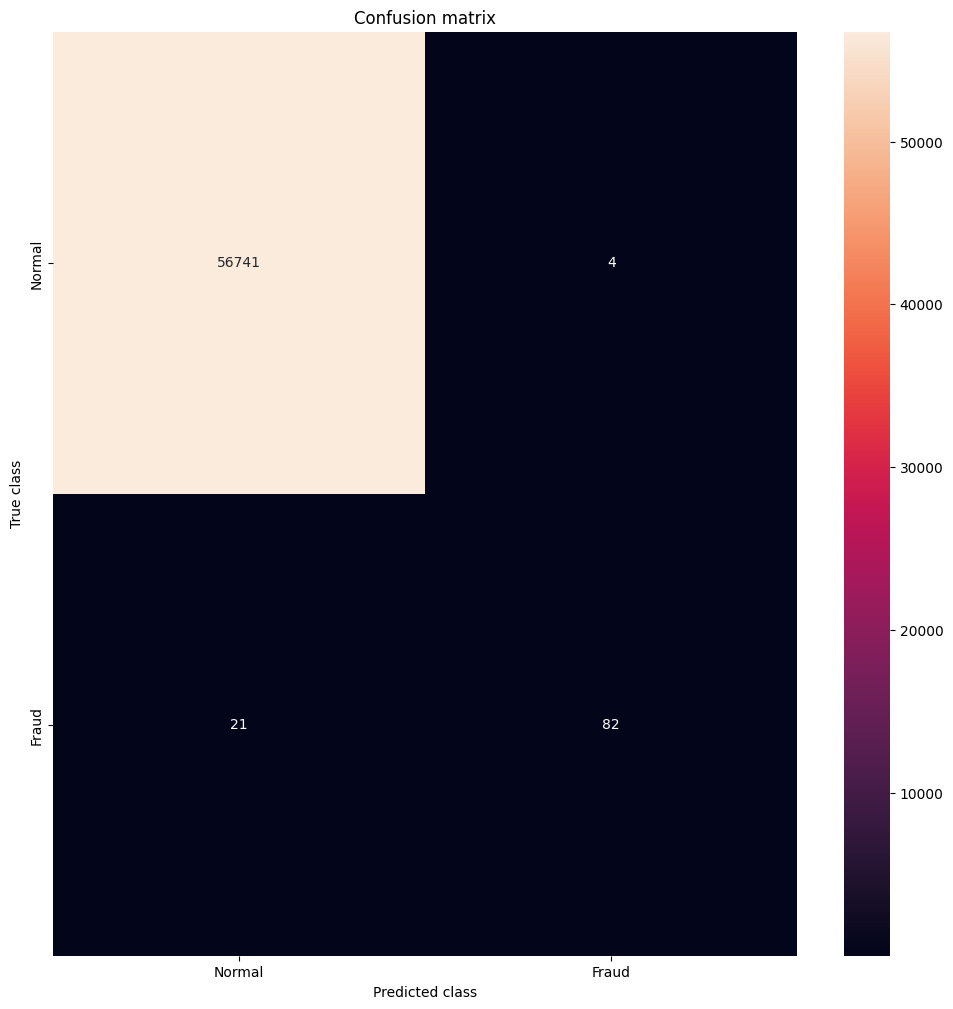

In [35]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


The model used is Bagging with Support Vector Classifier
The accuracy is 0.9981881508584295
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


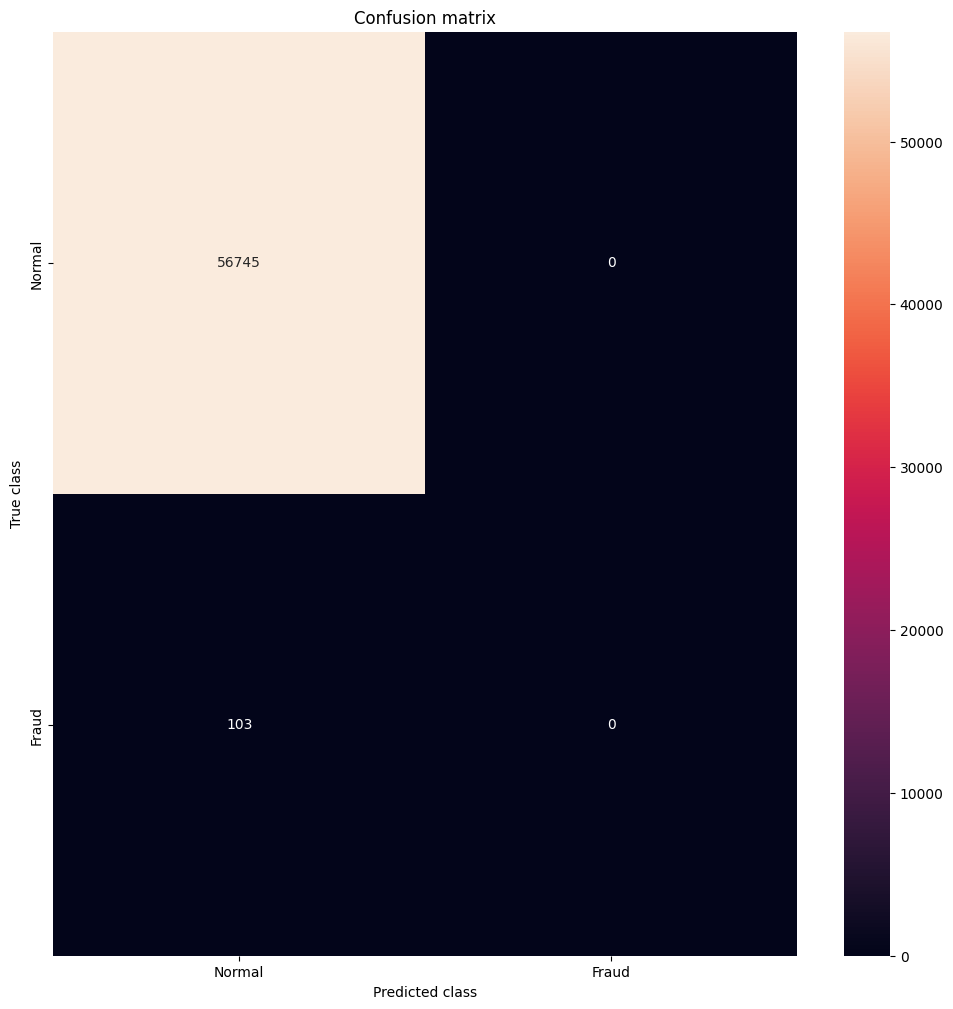

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
rSVC = BaggingClassifier(estimator=SVC(), oob_score=True, n_estimators=10, random_state=0)
rSVC.fit(xTrain, yTrain)
yPred = rSVC.predict(xTest)

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Bagging with Support Vector Classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

Best Model Recall: 0.9984520123839009
Best Model F1-Score: 0.9981910182992605
The accuracy is 0.9984520123839009
The precision is 0.6470588235294118
The recall is 0.32038834951456313
The F1-Score is 0.42857142857142855
The Matthews correlation coefficient is0.45465413360373047


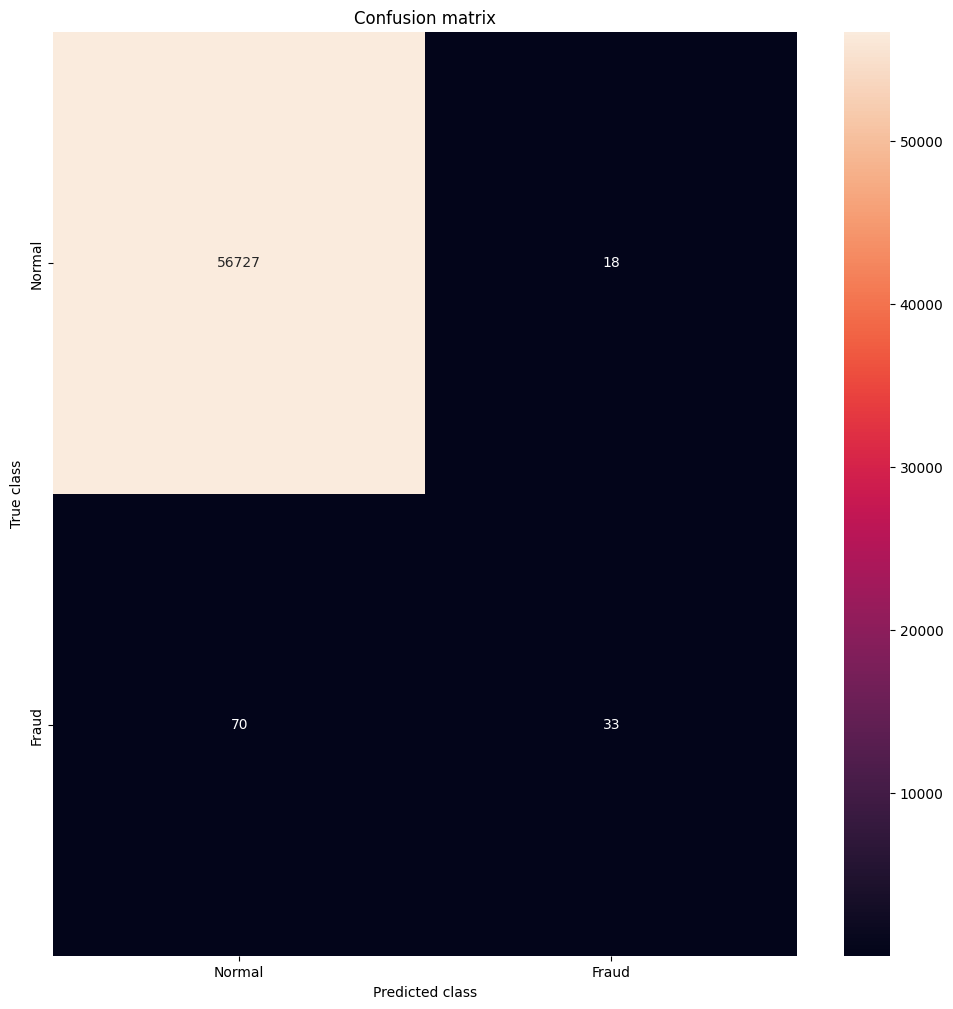

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

# Example: Assume you have X (features) and y (target labels)
# X, y = ... (your dataset)

# Define the base SVC model
svc = SVC(C=1,kernel='linear',gamma='auto')

# Define the hyperparameter grid for SVC directly (no bagging)
# param_grid = {
#     'C': [0.1, 1, 10, 100],             # Regularization parameter
#     'kernel': ['linear','poly','sigmoid','rbf'],        # Kernel type
#     'degree': [1,2,3,4,5,6],  # Kernel coefficient
# }

# # Set up the grid search with both recall and F1-score as scoring metrics
# scoring = {
#     'Recall': make_scorer(recall_score, average='weighted'),  # Prioritizing recall
#     'F1': make_scorer(f1_score, average='weighted')           # Prioritizing F1-score
# }

# # Set up GridSearchCV with StratifiedKFold to handle class imbalance
# grid_search = GridSearchCV(
#     estimator=svc, 
#     param_grid=param_grid,
#     scoring=scoring,  # Multiple scoring metrics
#     refit='F1',  # Use F1-score for choosing the best model
# )

# Fit the model
svc.fit(xTrain, yTrain)

y_pred = svc.predict(xTest)
print(f"Best Model Recall: {recall_score(yTest, y_pred, average='weighted')}")
print(f"Best Model F1-Score: {f1_score(yTest, y_pred, average='weighted')}")
acc = accuracy_score(yTest, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


The model used is Bagging with K Neighbors Classifier
The accuracy is 0.9983288770053476
The precision is 1.0
The recall is 0.07766990291262135
The F1-Score is 0.14414414414414414
The Matthews correlation coefficient is0.27846021023409323


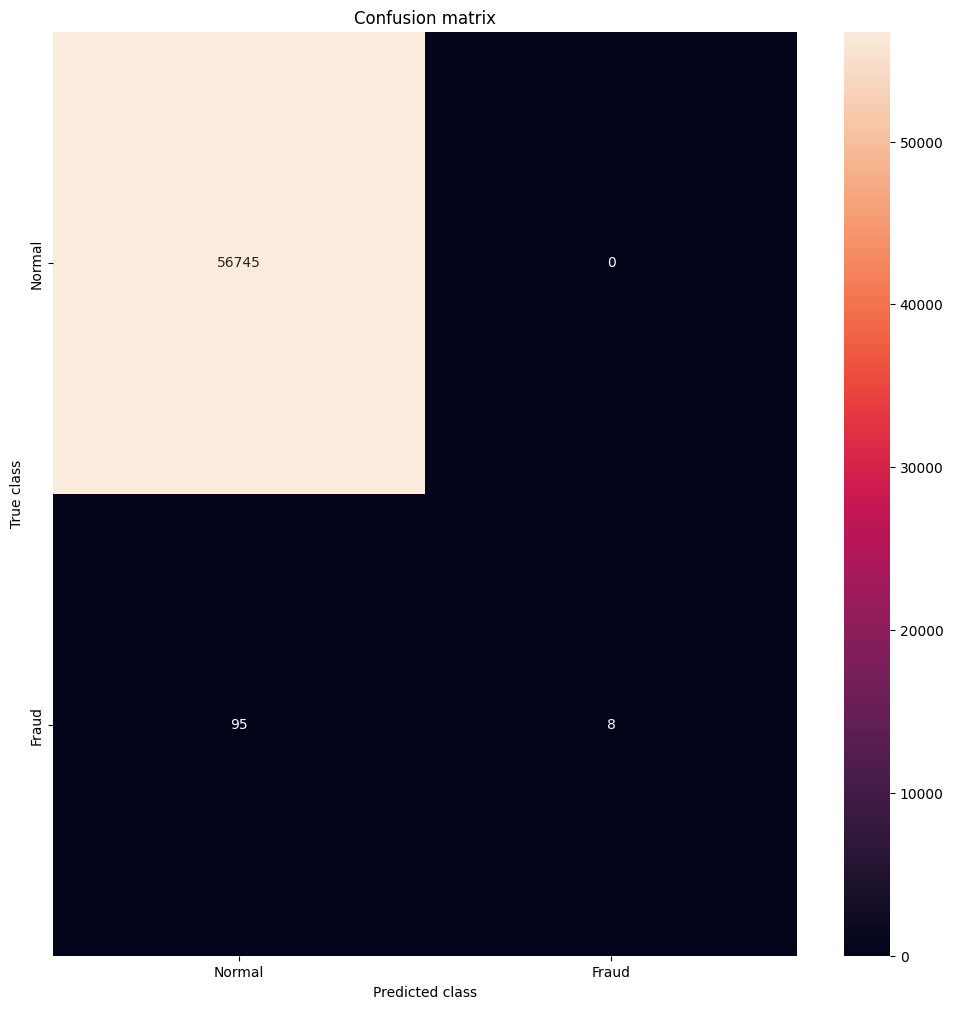

In [38]:
from sklearn.neighbors import KNeighborsClassifier
rKNN = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=10, random_state=0)
rKNN.fit(xTrain, yTrain)
yPred = rKNN.predict(xTest)

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Bagging with K Neighbors Classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:875: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:881: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


The model used is Bagging with Decision tree classifier
The accuracy is 0.9995778215592457
The precision is 0.9438202247191011
The recall is 0.8155339805825242
The F1-Score is 0.875
The Matthews correlation coefficient is0.877132448437781


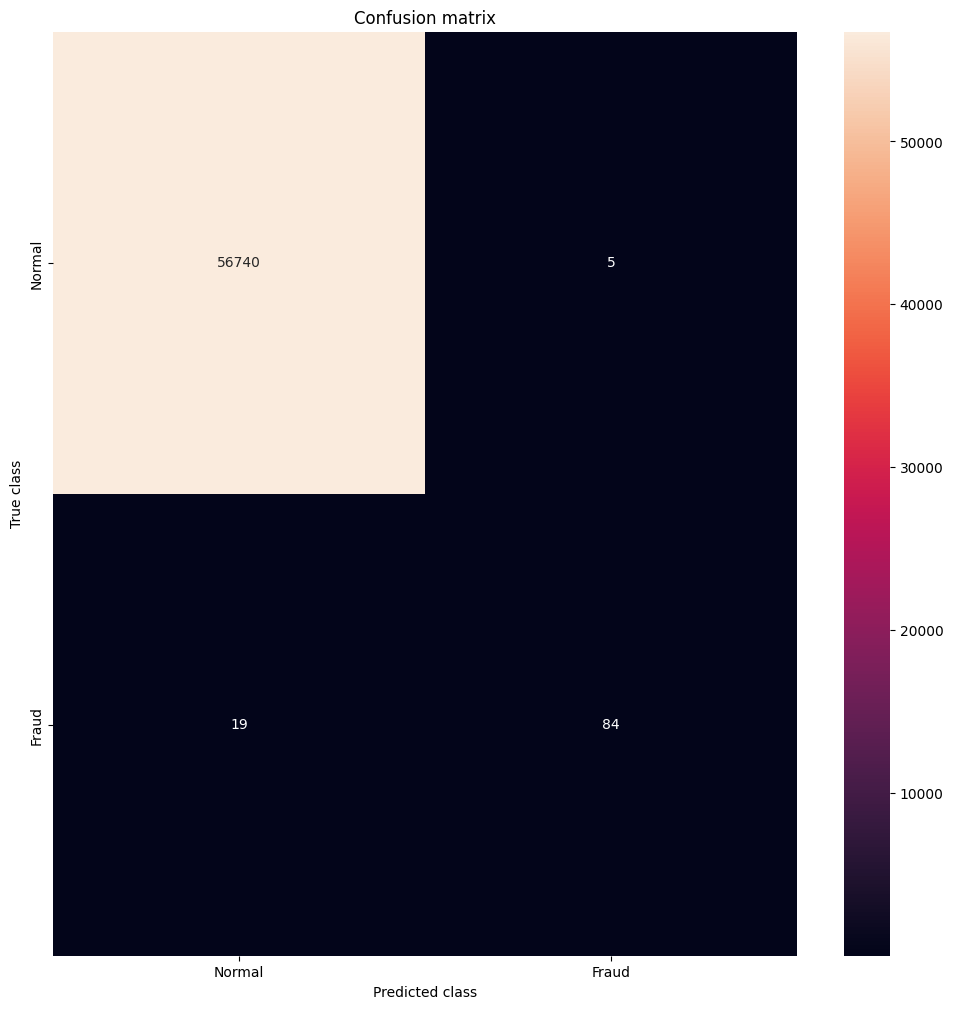

In [39]:
from sklearn.tree import DecisionTreeClassifier
rBDT = BaggingClassifier(estimator=DecisionTreeClassifier(), oob_score=True, n_estimators=10, random_state=0)
rBDT.fit(xTrain, yTrain)
yPred = rBDT.predict(xTest)

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Bagging with Decision tree classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The model used is K Neighbors Classifier
The accuracy is 0.9983288770053476
The precision is 1.0
The recall is 0.07766990291262135
The F1-Score is 0.14414414414414414
The Matthews correlation coefficient is0.27846021023409323


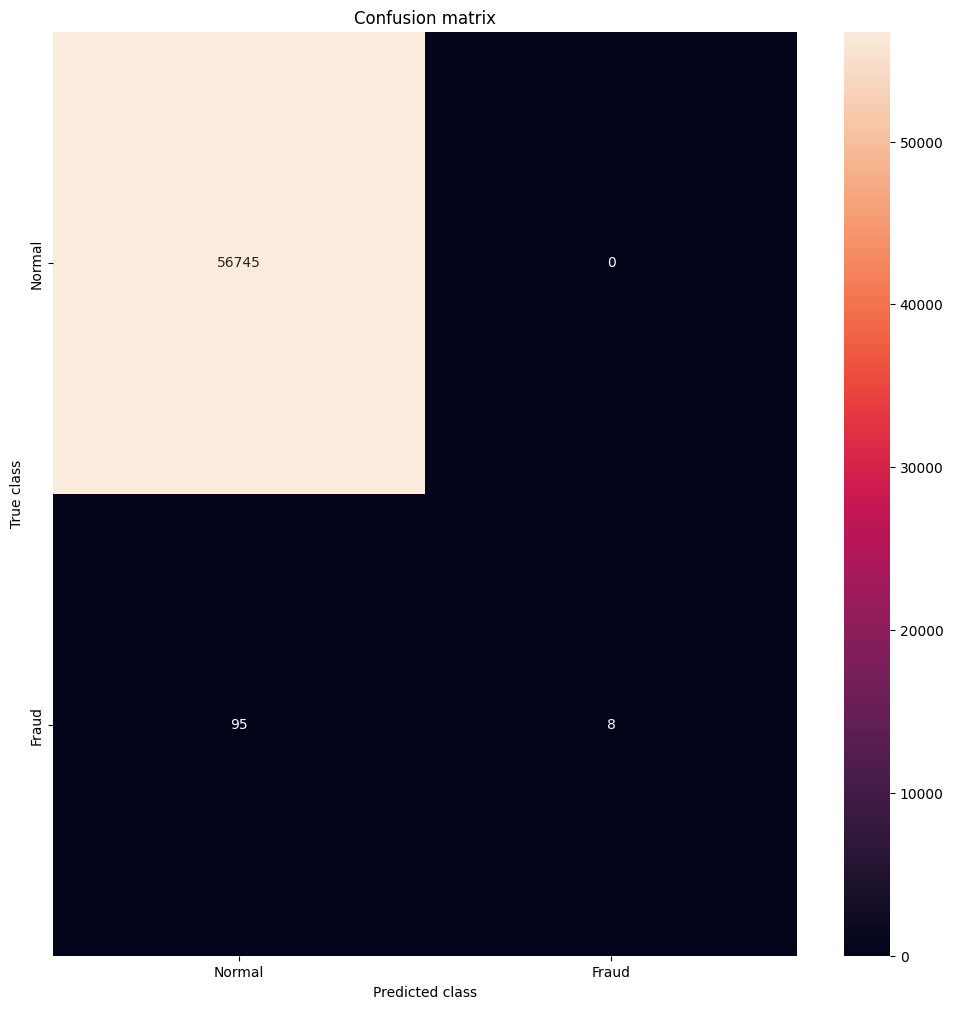

In [40]:
KNN = KNeighborsClassifier()
KNN.fit(xTrain, yTrain)
yPred = KNN.predict(xTest)

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is K Neighbors Classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56745
           1       0.71      0.88      0.78       103

    accuracy                           1.00     56848
   macro avg       0.85      0.94      0.89     56848
weighted avg       1.00      1.00      1.00     56848

XGBoost Model Recall: 0.7054263565891473
XGBoost Model F1-Score: 0.7844827586206896


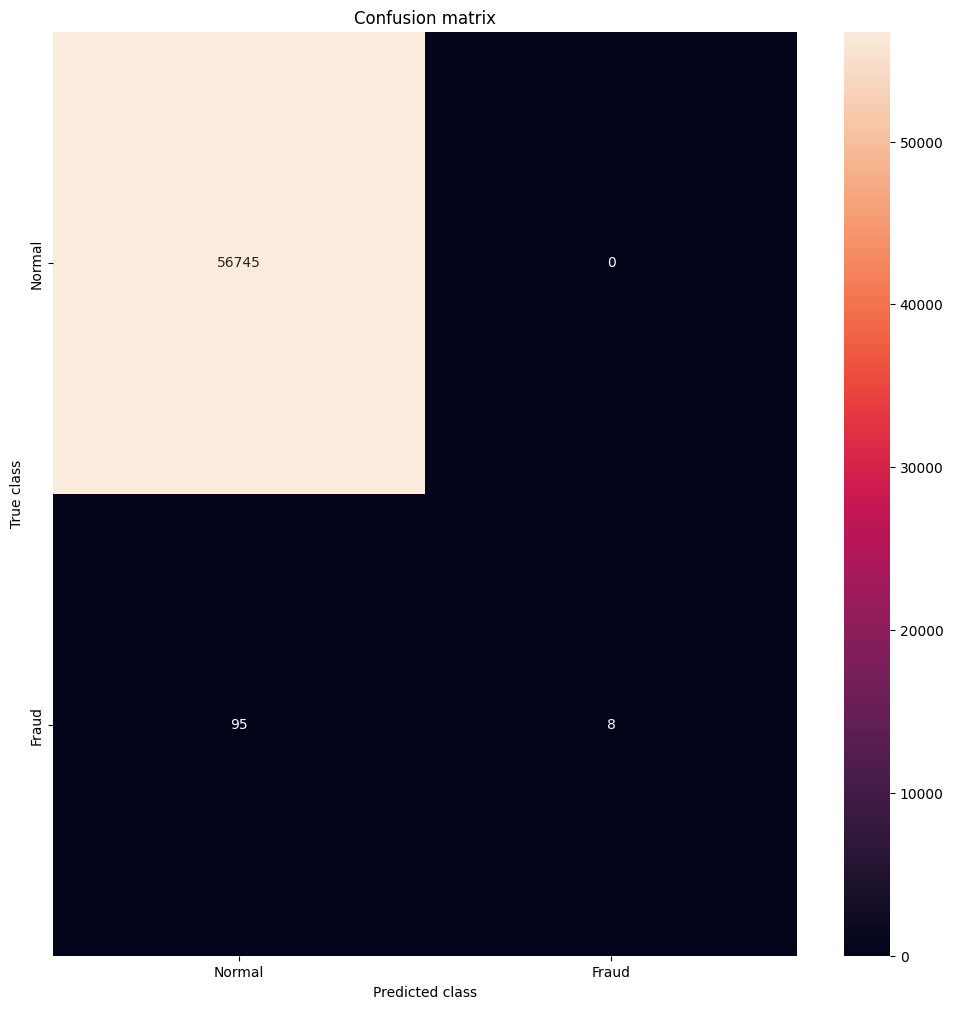

In [55]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, f1_score, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline

# Example: Assume you have X (features) and y (target labels)
# X, y = ... (your dataset)

# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a pipeline for SMOTE and XGBoost
smote_xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=1000,           # Number of boosting rounds
        max_depth=7,                # Maximum depth of trees
        learning_rate=0.01,          # Learning rate (eta)
        subsample=0.8,              # Subsample ratio of the training instances
        random_state=42,
        # use_label_encoder=False,    # To suppress warnings in new XGBoost versions
        eval_metric= 'logloss'       # Evaluation metric
    ))
])

# Fit the pipeline
smote_xgb_pipeline.fit(xTrain, yTrain)

# Predict on the test set
y_pred_xgb = smote_xgb_pipeline.predict(xTest)

# Print classification report for performance metrics
print(classification_report(yTest, y_pred_xgb))

# Evaluate the performance of the model
recall = recall_score(yTest, y_pred_xgb)
recall = precision_score(yTest, y_pred_xgb)
f1 = f1_score(yTest, y_pred_xgb)
print(f"XGBoost Model Recall: {recall}")
print(f"XGBoost Model F1-Score: {f1}")
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()